In [1]:
!pip install --upgrade pandas-profiling &> /dev/null

# Analyze traffic data set

In [2]:
import pandas as pd

In [3]:
traffic_df = pd.read_parquet('traffic_10lines.parquet')

In [4]:
traffic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 254899 entries, 3223247 to 10014282
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   date                254899 non-null  datetime64[ns]
 1   pax                 254899 non-null  float64       
 2   seats               250749 non-null  float64       
 3   flight_type         251168 non-null  object        
 4   flight_typename     254899 non-null  object        
 5   home_airport        254899 non-null  object        
 6   paired_airport      254899 non-null  object        
 7   home_airportname    254899 non-null  object        
 8   paired_airportname  254899 non-null  object        
 9   distance            254899 non-null  Int64         
 10  flight_number       251438 non-null  object        
 11  airline_iata        248648 non-null  object        
 12  airline_name        254813 non-null  object        
 13  scheduled_datetime  2

In [5]:
traffic_df.describe(include='all').transpose()
# all pour avoir également les chaînes de caractères

<ipython-input-5-67286ba2dda6>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  traffic_df.describe(include='all').transpose()
<ipython-input-5-67286ba2dda6>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  traffic_df.describe(include='all').transpose()


count  unique                  top    freq  \
date                  254899    2626  2019-01-02 00:00:00     165   
pax                 254899.0     NaN                  NaN     NaN   
seats               250749.0     NaN                  NaN     NaN   
flight_type           251168      19                    J  240627   
flight_typename       254899       4            Scheduled  251250   
home_airport          254899       8                  LIS  125254   
paired_airport        254899      10                  OPO   72331   
home_airportname      254899       8               Lisbon  125254   
paired_airportname    254899      10                Porto   72331   
distance            254899.0    <NA>                 <NA>    <NA>   
flight_number         251438    2663               TP 433    2332   
airline_iata          248648      90                   TP   91648   
airline_name          254813     131                  TAP   91648   
scheduled_datetime    254899  201668  2019-08-29 18:05:00       5   
direction             254899       2                    D  127622   
home_country          254899       7                   PT  125254   
paired_country        254899       8                   PT   72331   
home_countryname      254899       7             Portugal  125254   
paired_countryname    254899       8             Portugal   72331   
travel_area           254899       4             Domestic  108770   
aircraft_type         251439     168                 A320   30344   

                                  first                 last        mean  \
date                2016-01-01 00:00:00  2023-03-10 00:00:00         NaN   
pax                                 NaN                  NaN  127.082676   
seats                               NaN                  NaN  159.352879   
flight_type                         NaN                  NaN         NaN   
flight_typename                     NaN                  NaN         NaN   
home_airport                        NaN                  NaN         NaN   
paired_airport                      NaN                  NaN         NaN   
home_airportname                    NaN                  NaN         NaN   
paired_airportname                  NaN                  NaN         NaN   
distance                           <NA>                 <NA>  944.365078   
flight_number                       NaN                  NaN         NaN   
airline_iata                        NaN                  NaN         NaN   
airline_name                        NaN                  NaN         NaN   
scheduled_datetime  2016-01-01 06:10:00  2023-03-10 00:50:00         NaN   
direction                           NaN                  NaN         NaN   
home_country                        NaN                  NaN         NaN   
paired_country                      NaN                  NaN         NaN   
home_countryname                    NaN                  NaN         NaN   
paired_countryname                  NaN                  NaN         NaN   
travel_area                         NaN                  NaN         NaN   
aircraft_type                       NaN                  NaN         NaN   

                           std    min    25%     50%     75%      max  
date                       NaN    NaN    NaN     NaN     NaN      NaN  
pax                  53.050019  -11.0   88.0   140.0   168.0    582.0  
seats                47.311964    0.0  144.0   174.0   186.0    615.0  
flight_type                NaN    NaN    NaN     NaN     NaN      NaN  
flight_typename            NaN    NaN    NaN     NaN     NaN      NaN  
home_airport               NaN    NaN    NaN     NaN     NaN      NaN  
paired_airport             NaN    NaN    NaN     NaN     NaN      NaN  
home_airportname           NaN    NaN    NaN     NaN     NaN      NaN  
paired_airportname         NaN    NaN    NaN     NaN     NaN      NaN  
distance            886.540144  277.0  277.0  1109.0  1437.0  11653.0  
flight_number              NaN    NaN  

# Visualisation

In [6]:
(traffic_df
 .query('home_airport == "NTE" and paired_airport == "FUE"')
 ['airline_name']
 .value_counts()
 )

Volotea                362
Smartwings             140
Transavia               98
Enter Air               81
ASL Airlines France      1
Ryanair                  1
Name: airline_name, dtype: int64

In [7]:
(traffic_df
 .query('home_airport == "NTE" and paired_airport == "FUE" and pax >= 100')     #On selectione uniquement les gros volumes
 ['airline_name']
 .value_counts()
 )

Volotea                339
Smartwings             116
Transavia               90
Enter Air               77
ASL Airlines France      1
Name: airline_name, dtype: int64

In [8]:
(traffic_df
 .query('home_airport == "NTE" and paired_airport == "FUE"')
 .groupby(['home_airport', 'paired_airport', 'date'])
 .agg(pax_total = ('pax', 'sum'))
 .reset_index()
 .set_index('date'))

home_airport paired_airport  pax_total
date                                             
2019-01-06          NTE            FUE      456.0
2019-01-07          NTE            FUE      142.0
2019-01-13          NTE            FUE      519.0
2019-01-20          NTE            FUE      553.0
2019-01-27          NTE            FUE      528.0
...                 ...            ...        ...
2023-02-19          NTE            FUE      296.0
2023-02-25          NTE            FUE      638.0
2023-02-26          NTE            FUE      289.0
2023-03-04          NTE            FUE      584.0
2023-03-05          NTE            FUE      290.0

[293 rows x 3 columns]

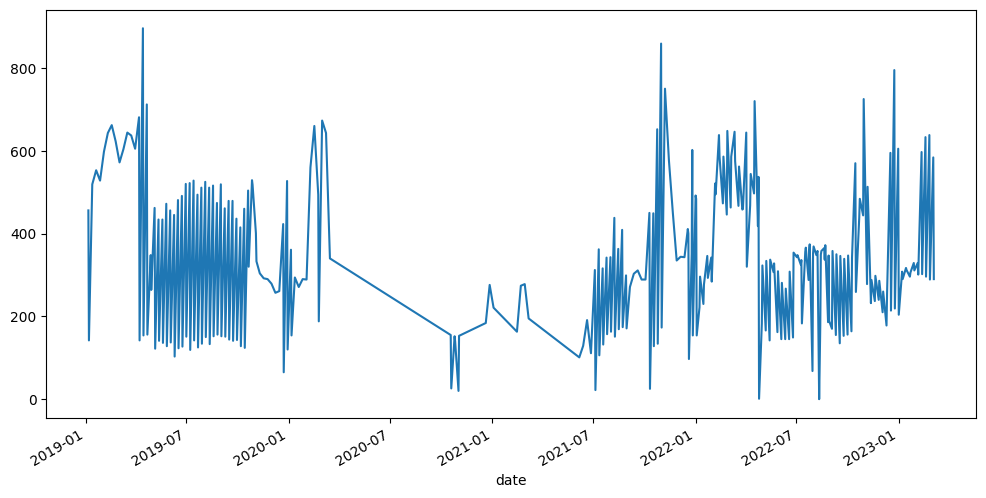

In [9]:
(traffic_df
 .query('home_airport == "NTE" and paired_airport == "FUE"')
 .groupby(['home_airport', 'paired_airport', 'date'])
 .agg(pax_total = ('pax', 'sum'))
 .reset_index()
 .set_index('date')
 ['pax_total']
 .plot(figsize=(12,6))
 );

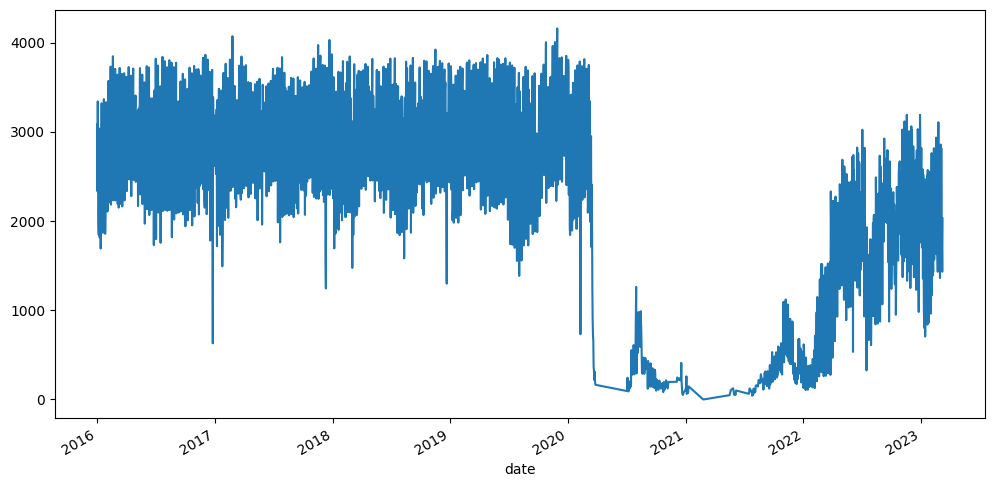

In [10]:
(traffic_df
 .query('home_airport == "LGW" and paired_airport == "AMS"')
 .groupby(['home_airport', 'paired_airport', 'date'])
 .agg(pax_total = ('pax', 'sum'))
 .reset_index()
 .set_index('date')
 ['pax_total']
 .plot(figsize=(12,6))
 );

In [11]:
import seaborn as sns

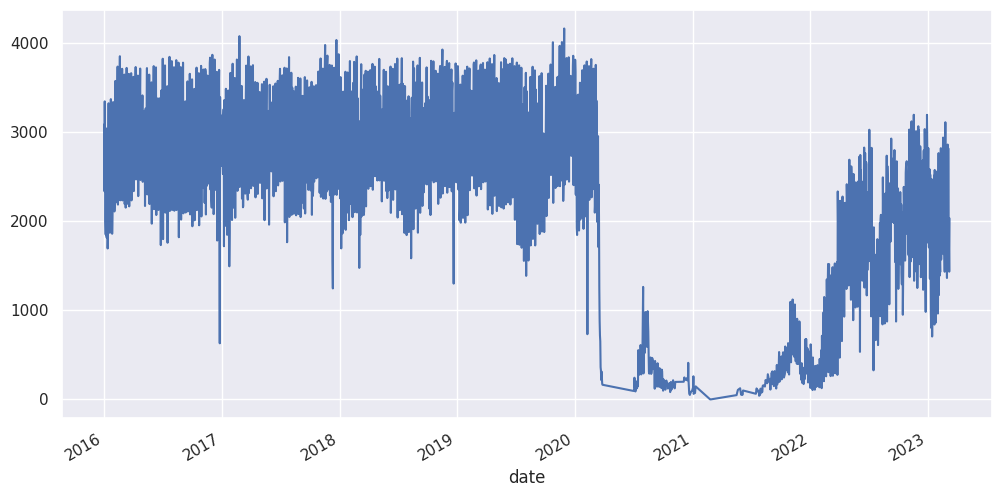

In [12]:
sns.set()
(traffic_df
 .query('home_airport == "LGW" and paired_airport == "AMS"')
 .groupby(['home_airport', 'paired_airport', 'date'])
 .agg(pax_total = ('pax', 'sum'))
 .reset_index()
 .set_index('date')
 ['pax_total']
 .plot(figsize=(12,6))
 );

In [13]:
df_lgw_ams = (traffic_df
 .query('home_airport == "LGW" and paired_airport == "AMS"')
 .groupby(['home_airport', 'paired_airport', 'date'])
 .agg(pax_total = ('pax', 'sum'))
 .reset_index())
df_lgw_ams

home_airport paired_airport       date  pax_total
0             LGW            AMS 2016-01-01     3081.0
1             LGW            AMS 2016-01-02     2334.0
2             LGW            AMS 2016-01-03     3341.0
3             LGW            AMS 2016-01-04     2665.0
4             LGW            AMS 2016-01-05     1996.0
...           ...            ...        ...        ...
2243          LGW            AMS 2023-03-05     2815.0
2244          LGW            AMS 2023-03-06     1916.0
2245          LGW            AMS 2023-03-07     1741.0
2246          LGW            AMS 2023-03-08     1432.0
2247          LGW            AMS 2023-03-09     2029.0

[2248 rows x 4 columns]

In [14]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots


def draw_ts(df, x_col, y_col, title=None, secondary_y=False, covid_period=None,
            display=True, line_colors=None, line_width=2, marker_size=6,
            x_label=None, y_label=None, legend_labels=None):
    fig = make_subplots(specs=[[{"secondary_y": secondary_y}]])

    if title:
        fig.update_layout(title=title)

    if isinstance(y_col, str):
        y_col = [y_col]

    for i, col in enumerate(y_col):
        if line_colors:
            line_color = line_colors[i] if i < len(line_colors) else None
        else:
            line_color = None

        fig.add_trace(
            go.Scatter(x=df[x_col], y=df[col], name=legend_labels[i] if legend_labels else col,
                       line=dict(color=line_color, width=line_width),
                       marker=dict(size=marker_size)
                       ),
            secondary_y=False
        )

    if secondary_y:
        fig.update_yaxes(title_text=y_label[0] if y_label else y_col[0], secondary_y=False)
        fig.update_yaxes(title_text=y_label[1] if y_label and len(y_label) > 1 else y_col[1], secondary_y=True)

    fig.update_xaxes(
        rangeselector=dict(
            buttons=list([
                dict(count=1, label='1m', step='month', stepmode='backward'),
                dict(count=3, label='3m', step='month', stepmode='backward'),
                dict(count=6, label='6m', step='month', stepmode='backward'),
                dict(count=8, label='8m', step='month', stepmode='backward'),
                dict(step='all')
            ])
        ),
        rangeslider=dict(visible=True),
        type='date',
        title_text=x_label
    )

    fig.update_yaxes(rangemode='tozero', title_text=y_label[0] if y_label else y_col[0])

    if covid_period:
        fig.add_vrect(
            x0=pd.Timestamp(covid_period[0]), x1=pd.Timestamp(covid_period[1]),
            fillcolor="Gray", opacity=0.5,
            layer="below", line_width=0
        )

    if display:
        fig.show()

    return fig


df_lgw_ams = (traffic_df
 .query('home_airport == "LGW" and paired_airport == "AMS"')
 .groupby(['home_airport', 'paired_airport', 'date'])
 .agg(pax_total = ('pax', 'sum'))
 .reset_index())

# Chart configuration
x_col = 'date'
y_col = 'pax_total'
title='Passenger Traffic LGW-AMS'
secondary_y = False
covid_period = ('2020-03-01', '2022-01-30')
line_colors = ['#ff7f0e']
line_width = 2
marker_size = 6
x_label = 'Date'
legend_labels = 'Nombre de passager'


# Generate the chart
fig = draw_ts(df_lgw_ams, x_col, y_col, title=title, secondary_y=secondary_y,
              covid_period=covid_period, line_colors=line_colors,
              line_width=line_width, marker_size=marker_size,
              x_label=x_label, legend_labels=legend_labels)



In [15]:
# data
df_lgw_ams = (traffic_df
              .query('home_airport == "LGW" and paired_airport == "AMS"')
              .groupby(['date'])
              .agg(pax_total=('pax', 'sum'))
              .reset_index()
             )

In [16]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# data
df_lgw_ams = (traffic_df
              .query('home_airport == "LGW" and paired_airport == "AMS"')
              .groupby(['date'])
              .agg(pax_total=('pax', 'sum'))
              .reset_index()
             )

# create traces
trace1 = go.Scatter(x=df_lgw_ams['date'], y=df_lgw_ams['pax_total'],
                    fill='tozeroy', name='LGW → AMS')
trace2 = go.Scatter(x=df_lgw_ams['date'], y=-df_lgw_ams['pax_total'],
                    fill='tozeroy', name='AMS → LGW')

# create subplot figure
fig = make_subplots(rows=1, cols=1)

# add traces to subplot figure
fig.add_trace(trace1)
fig.add_trace(trace2)

# update layout
fig.update_layout(title='Passenger Traffic LGW-AMS',
                  xaxis_title='Date',
                  yaxis_title='Passenger Traffic',
                  hovermode='x unified')

# update legend
fig.update_traces(showlegend=True)
fig.update_layout(legend=dict(
    orientation='h',
    yanchor="bottom",
    y=-0.3,
    xanchor="center",
    x=0.5,
    font=dict(size=12),
    bgcolor='rgba(0,0,0,0)'
))

# show plot
fig.show()


In [17]:
import plotly.offline as pyoff
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import pandas as pd
import numpy as np
from typing import Union, List, Optional

def draw_ts_multiple(df: pd.DataFrame, v1: Union[str, List[str]], v2: Optional[str] = None,
                     prediction: Optional[str] = None, date: str = 'date',
                     secondary_y: bool = True, covid_start: Optional[str] = None,
                     covid_end: Optional[str] = None, display: bool = True,
                     moving_avg_window: Optional[int] = None) -> go.Figure:
    """Draw time series on multiple y axes, with COVID period option.

    Args:
    - df (pd.DataFrame): Time series dataframe (one line per date, series in columns).
    - v1 (str or list[str]): Name or list of names of the series to plot on the first y-axis.
    - v2 (str): Name of the series to plot on the second y-axis (default: None).
    - prediction (str): Name of the predicted series displayed with a dotted line (default: None).
    - date (str): Name of the date column (default: 'date').
    - secondary_y (bool): Use a secondary y-axis if v2 is used (default: True).
    - covid_start (str): Start date of the COVID-19 period (default: None).
    - covid_end (str): End date of the COVID-19 period (default: None).
    - display (bool): Display the figure (default: True).
    - moving_avg_window (int): Window size for computing the moving average (default: None).

    Returns:
    - fig (plotly.graph_objs._figure.Figure): Plotly figure.

    Notes:
    Make sure to use the semi-colon trick if you don't want to have the figure displayed twice.
    Or use `display=False`.
    """
    if isinstance(v1, str):
        v1 = [v1]
    if v2:
        y_axis_titles = [f'{v}: V1' for v in v1] + ['V2']
    else:
        y_axis_titles = [f'V1: {v}' for v in v1]

    layout = {
        'title': '<br>'.join(y_axis_titles),
        'xaxis': {
            'rangeselector': {
                'buttons': [
                    {'count': 1, 'label': '1m', 'step': 'month', 'stepmode': 'backward'},
                    {'count': 3, 'label': '3m', 'step': 'month', 'stepmode': 'backward'},
                    {'count': 6, 'label': '6m', 'step': 'month', 'stepmode': 'backward'},
                    {'count': 8, 'label': '8m', 'step': 'month', 'stepmode': 'backward'},
                    {'count': 12, 'label': '1Y', 'step': 'month', 'stepmode': 'backward'},
                    {'count': 24, 'label': '2Y', 'step': 'month', 'stepmode': 'backward'},
                    {'count': 36, 'label': '3Y', 'step': 'month', 'stepmode': 'backward'},
                    {'count': 58, 'label': '4Y', 'step': 'month', 'stepmode': 'backward'},
                    {'step': 'all'}
                ]
            },
            'rangeslider': {'visible': True},
            'type': 'date'
        }
    }

    fig = make_subplots(specs=[[{"secondary_y": secondary_y}]], shared_xaxes=True)
    fig.update_layout(layout)

    for i, v in enumerate(v1):
        fig.add_trace(go.Scatter(x=df[date], y=df[v], name=f'V1.{i}'), secondary_y=False)

        if moving_avg_window is not None:
            moving_avg = df[v].rolling(window=moving_avg_window, min_periods=1).mean()
            fig.add_trace(go.Scatter(x=df[date], y=moving_avg, name=f'{v} Moving Avg.'), secondary_y=False)

            std = df[v].rolling(window=moving_avg_window, min_periods=1).std()
            upper_bound = moving_avg + 2 * std
            lower_bound = moving_avg - 2 * std
            fig.add_trace(go.Scatter(x=df[date], y=upper_bound, name=f'{v} Upper Bound', line={'dash': 'dash'}), secondary_y=False)
            fig.add_trace(go.Scatter(x=df[date], y=lower_bound, name=f'{v} Lower Bound', line={'dash': 'dash'}), secondary_y=False)

    if v2:
        fig.add_trace(go.Scatter(x=df[date], y=df[v2], name='V2'), secondary_y=secondary_y)
        fig['layout']['yaxis2']['showgrid'] = False
        fig.update_yaxes(rangemode='tozero')
        fig.update_layout(margin=dict(t=125 + 30 * (len(v1) - 1)))

    if prediction:
        fig.add_trace(go.Scatter(x=df[date], y=df[prediction], name='^V1', line={'dash': 'dot'}), secondary_y=False)

    if covid_start and covid_end:
        fig.add_vrect(
            x0=pd.Timestamp(covid_start),
            x1=pd.Timestamp(covid_end),
            fillcolor='Gray',
            opacity=0.5,
            layer='below',
            line_width=0
        )

    if display:
        pyoff.iplot(fig)

    return fig



In [18]:

df_lgw_ams = (traffic_df
 .query('home_airport == "LGW" and paired_airport == "AMS"')
 .groupby(['home_airport', 'paired_airport', 'date'])
 .agg(pax_total = ('pax', 'sum'))
 .reset_index())


# Chart configuration
date_column = 'date'
passenger_column = 'pax_total'
title = 'Passenger Traffic LGW-AMS'
covid_period = ('2020-03-01', '2022-01-30')
line_colors = ['#ff7f0e']
line_width = 2
marker_size = 6
x_label = 'Date'
legend_labels = ['Nombre de passager']

# Generate the chart
fig = draw_ts_multiple(df_lgw_ams, v1=passenger_column, date=date_column, v2=None,
                       prediction=None, secondary_y=False, covid_start=covid_period[0],
                       covid_end=covid_period[1], display=True, moving_avg_window=7)

In [19]:
nte_fue_df = (traffic_df
              .query('home_airport == "NTE" and paired_airport == "FUE"')
              .groupby(['home_airport', 'paired_airport', 'date'])
              .agg(pax_total=('pax', 'sum')).reset_index())



# Chart configuration
date_column = 'date'
passenger_column = 'pax_total'
title = 'Passenger Traffic NTE-FUE'
covid_period = ('2020-03-01', '2022-01-30')
line_colors = ['#ff7f0e']
line_width = 2
marker_size = 6
x_label = 'Date'
legend_labels = ['Nombre de passager']

# Generate the chart
fig = draw_ts_multiple(nte_fue_df, v1=passenger_column, date=date_column, v2=None,
                       prediction=None, secondary_y=False, covid_start=covid_period[0],
                       covid_end=covid_period[1], display=True, moving_avg_window=7)



# First model with facebook

In [20]:
import pandas as pd

In [21]:
def generate_route_df(traffic_df: pd.DataFrame, homeAirport: str, pairedAirport: str) ->  pd.DataFrame:
  """exctract route dataframe from traffic dataframe from home airport to paired airport
  Args:
  - traffic_df(pd.DataFrame): traffic dataframe
  - homeAirport(str): IATA code from home airport
  - pairAirport (str): IATA code from paired airport

  Returns:
  - pd.DataFrame: aggregated daily PAX traffic on route (home-paired)
  """
  _df = (traffic_df
        .query('home_airport == "{home}" and paired_airport == "{paired}"'.format(home=homeAirport,paired=pairedAirport))
        .groupby(['home_airport', 'paired_airport', 'date'])
        .agg(pax_total=('pax', 'sum'))
        .reset_index()
        )
  return _df

In [22]:
generate_route_df(traffic_df ,"LGW","AMS")

home_airport paired_airport       date  pax_total
0             LGW            AMS 2016-01-01     3081.0
1             LGW            AMS 2016-01-02     2334.0
2             LGW            AMS 2016-01-03     3341.0
3             LGW            AMS 2016-01-04     2665.0
4             LGW            AMS 2016-01-05     1996.0
...           ...            ...        ...        ...
2243          LGW            AMS 2023-03-05     2815.0
2244          LGW            AMS 2023-03-06     1916.0
2245          LGW            AMS 2023-03-07     1741.0
2246          LGW            AMS 2023-03-08     1432.0
2247          LGW            AMS 2023-03-09     2029.0

[2248 rows x 4 columns]

In [23]:
!pip install prophet &> /dev/null

In [24]:
from prophet import Prophet

def generate_route_df(traffic_df: pd.DataFrame, homeAirport: str, pairedAirport: str) -> pd.DataFrame:
    """Extracts route dataframe from traffic dataframe from home airport to paired airport.

    Args:
    - traffic_df(pd.DataFrame): traffic dataframe
    - homeAirport(str): IATA code from home airport
    - pairAirport (str): IATA code from paired airport

    Returns:
    - pd.DataFrame: aggregated daily PAX traffic on route (home-paired)
    """
    route_df = (traffic_df
        .query(f'home_airport == "{homeAirport}" and paired_airport == "{pairedAirport}"')
        .groupby(['home_airport', 'paired_airport', 'date'])
        .agg(pax_total=('pax', 'sum'))
        .reset_index()
    )
    return route_df




In [25]:
# Extract data for the specific route
route_df = generate_route_df(traffic_df, "LGW", "AMS")

# Rename columns for compatibility with Prophet
route_df = route_df.rename(columns={'date':'ds', 'pax_total':'y'})

# Create a Prophet instance for the baseline model
baseline_model = Prophet()

# Train the model on the data for the specific route
baseline_model.fit(route_df)

# Create a dataframe for future predictions
future_df = baseline_model.make_future_dataframe(periods=365)

# Generate forecasts for the future period
forecast = baseline_model.predict(future_df)


import plotly.offline as pyoff
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import pandas as pd
from typing import Union, List, Optional


# Extract data for the specific route
df_lgw_ams = generate_route_df(traffic_df, "LGW", "AMS")

# Chart configuration
date_column = 'date'
passenger_column = 'pax_total'
title = 'Passenger Traffic LGW-AMS'
covid_period = ('2020-03-01', '2022-01-30')
line_colors = ['#ff7f0e']
line_width = 2
marker_size = 6
x_label = 'Date'
legend_labels = ['Nombre de passager']

# Generate the chart
fig = draw_ts_multiple(df_lgw_ams, v1=passenger_column, date=date_column, v2=None,
                       prediction=None, secondary_y=False, covid_start=covid_period[0],
                       covid_end=covid_period[1], display=False, moving_avg_window=7)

# Add forecast data to the chart
fig.add_trace(go.Scatter(x=forecast['ds'], y=forecast['yhat'], mode='lines', name='Prévisions'))

# Update the figure layout
fig.update_layout(
    title=title,
    xaxis_title=x_label,
    yaxis_title='Nombre de passagers',
    legend_title_text='Légende',
    hovermode='x',
    legend=dict(
        x=1,
        y=0,
        traceorder='normal',
        font=dict(
            family='sans-serif',
            size=12,
            color='black'
        ),
        bgcolor='rgba(0,0,0,0)',
        bordercolor='rgba(0,0,0,0)'
    )
)

# Show the chart
pyoff.iplot(fig)


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmk0iasok/3orl3so5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmk0iasok/3sfvl3th.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=9697', 'data', 'file=/tmp/tmpmk0iasok/3orl3so5.json', 'init=/tmp/tmpmk0iasok/3sfvl3th.json', 'output', 'file=/tmp/tmpmk0iasok/prophet_modelr83a_oxe/prophet_model-20240129092623.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:26:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:26:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


# Les codes suivant sont a utiiliser sur streamlit

DEBUG:cmdstanpy:input tempfile: /tmp/tmpmk0iasok/t9_e9mzx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmk0iasok/q_n8zbl6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=93019', 'data', 'file=/tmp/tmpmk0iasok/t9_e9mzx.json', 'init=/tmp/tmpmk0iasok/q_n8zbl6.json', 'output', 'file=/tmp/tmpmk0iasok/prophet_modelxe3pi6og/prophet_model-20240129092625.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:26:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:26:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2017-10-01 00:00:00 and 2022-03-09 00:00:00


  0%|          | 0/10 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpmk0iasok/3t7ijioc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmk0iasok/an3kotzl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=51853', 'data', 'file=/tmp/tmpmk0iasok/3t7ijioc.json', 'init=/tmp/tmpmk0iasok/an3kotzl.json', 'output', 'file=/tmp/tmpmk0iasok/prophet_modelq_53qjz6/prophet_model-20240129092625.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:26:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:26:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmk0iasok/6j2hfol_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmk0iasok/q56yn7b3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

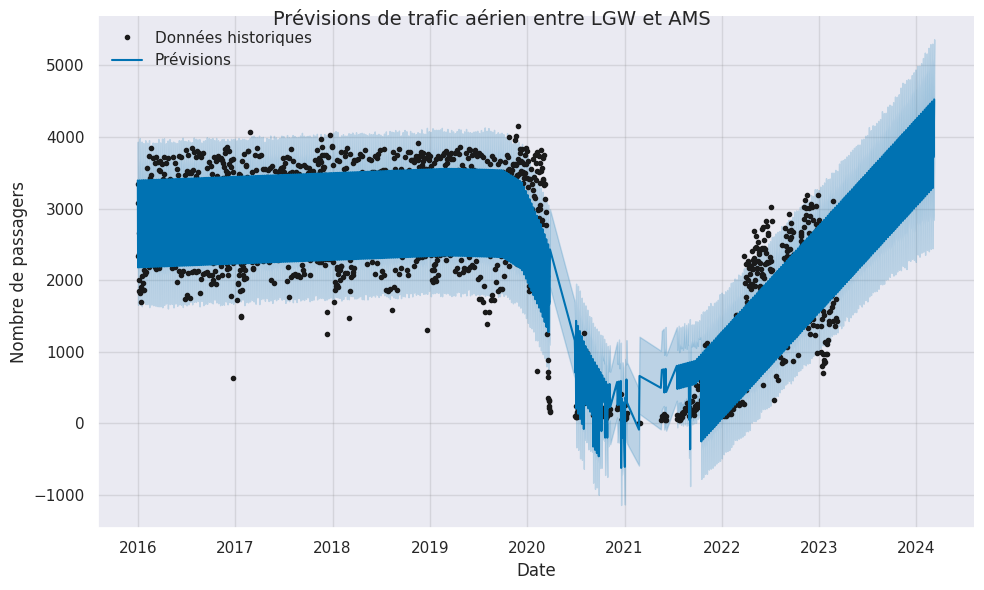

Performance Metrics:
      horizon           mse         rmse          mae     mdape     smape  \
0    38 days  8.469809e+05   920.315644   605.737423  0.108049  0.627649   
1    39 days  8.563713e+05   925.403340   611.733598  0.108498  0.628922   
2    40 days  8.680062e+05   931.668522   614.418600  0.108049  0.628866   
3    41 days  8.744661e+05   935.128906   613.234499  0.106740  0.626480   
4    42 days  8.643900e+05   929.725740   612.884436  0.107371  0.623280   
..       ...           ...          ...          ...       ...       ...   
323 361 days  7.497315e+06  2738.122494  2001.076797  1.444401  1.059661   
324 362 days  7.546820e+06  2747.147533  2011.590610  1.460200  1.069338   
325 363 days  7.640903e+06  2764.218395  2035.389229  1.466506  1.082073   
326 364 days  7.725241e+06  2779.431816  2049.255012  1.471680  1.089376   
327 365 days  7.814766e+06  2795.490379  2064.494767  1.518109  1.094501   

     coverage  
0    0.613715  
1    0.607253  
2    0.609182  
3

In [26]:
from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics
import matplotlib.pyplot as plt

# Function to extract data for the specific route
def generate_route_df(traffic_df: pd.DataFrame, homeAirport: str, pairedAirport: str) -> pd.DataFrame:
    """Extract route dataframe from traffic dataframe from home airport to paired airport.
    Args:
        - traffic_df (pd.DataFrame): Traffic dataframe.
        - homeAirport (str): IATA code from home airport.
        - pairedAirport (str): IATA code from paired airport.

    Returns:
        - pd.DataFrame: Aggregated daily PAX traffic on route (home-paired).
    """
    _df = (traffic_df
           .query('home_airport == "{home}" and paired_airport == "{paired}"'.format(home=homeAirport, paired=pairedAirport))
           .groupby(['home_airport', 'paired_airport', 'date'])
           .agg(pax_total=('pax', 'sum'))
           .reset_index())
    return _df

# Extraction des données de la route spécifique
route_df = generate_route_df(traffic_df, "LGW", "AMS")

# Renommage des colonnes pour être compatibles avec Prophet
route_df = route_df.rename(columns={'date': 'ds', 'pax_total': 'y'})

# Optimisation du modèle
baseline_model = Prophet(
    yearly_seasonality=False,
    weekly_seasonality=True,
    daily_seasonality=False,
    seasonality_mode='additive',
    changepoint_prior_scale=0.05
)

# Entraînement du modèle sur les données de la route spécifique
baseline_model.fit(route_df)

# Évaluation du modèle
cv_results = cross_validation(
    baseline_model,
    initial='500 days',
    period='180 days',
    horizon='365 days'
)

performance = performance_metrics(cv_results)

# Création d'un dataframe pour les prévisions futures
future_df = baseline_model.make_future_dataframe(periods=365)

# Génération des prévisions pour la période future
forecast = baseline_model.predict(future_df)

# Affichage des prévisions
fig = baseline_model.plot(forecast)
fig.suptitle('Prévisions de trafic aérien entre LGW et AMS', fontsize=14)
ax = fig.gca()
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Nombre de passagers', fontsize=12)

# Amélioration de l'apparence du graphique
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend(['Données historiques', 'Prévisions'], loc='upper left', frameon=False)

plt.show()

# Affichage des performances du modèle
print('Performance Metrics:\n', performance)


##Code pour Streamlit avec amélioration

In [ ]:
#import streamlit as st
import plotly.offline as pyoff
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import pandas as pd
from typing import Union, List, Optional
from prophet import Prophet


def main():

    # Extract data for the specific route
    df_lgw_ams = generate_route_df(traffic_df, "LGW", "AMS")

    # Chart configuration
    date_column = 'date'
    passenger_column = 'pax_total'
    title = 'Passenger Traffic LGW-AMS'
    covid_period = ('2020-03-01', '2022-01-30')
    line_colors = ['#ff7f0e']
    line_width = 2
    marker_size = 6
    x_label = 'Date'
    legend_labels = ['Nombre de passager']

    # Generate the chart
    fig = draw_ts_multiple(df_lgw_ams, v1=passenger_column, date=date_column, v2=None,
                           prediction=None, secondary_y=False, covid_start=covid_period[0],
                           covid_end=covid_period[1], display=False, moving_avg_window=7)

    # MODEL PROPHET:

    # Extraction des données de la route spécifique
    route_df = generate_route_df(traffic_df, "LGW", "AMS")

    # Renommage des colonnes pour être compatibles avec Prophet
    route_df = route_df.rename(columns={'date': 'ds', 'pax_total': 'y'})

    # Optimisation du modèle
    baseline_model = Prophet(
        yearly_seasonality=False,
        weekly_seasonality=True,
        daily_seasonality=False,
        seasonality_mode='additive',
        changepoint_prior_scale=0.05
    )

    # Entraînement du modèle sur les données de la route spécifique
    baseline_model.fit(route_df)


    # Évaluation du modèle
    cv_results = cross_validation(
        baseline_model,
        initial='500 days',
        period='180 days',
        horizon='365 days'
    )

    performance = performance_metrics(cv_results)

    # Création d'un dataframe pour les prévisions futures
    future_df = baseline_model.make_future_dataframe(periods=365)

    # Génération des prévisions pour la période future
    forecast = baseline_model.predict(future_df)

    # Add forecast data to the chart
    fig.add_trace(go.Scatter(x=forecast['ds'], y=forecast['yhat'], mode='lines', name='Prévisions'))

    # Update the figure layout
    fig.update_layout(
        title=title,
        xaxis_title=x_label,
        yaxis_title='Nombre de passagers',
        legend_title_text='Légende',
        hovermode='x',
        legend=dict(
            x=1,
            y=0,
            traceorder='normal',
            font=dict(
                family='sans-serif',
                size=12,
                color='black'
            ),
            bgcolor='rgba(0,0,0,0)',
            bordercolor='rgba(0,0,0,0)'
        )
    )

    # Display the chart using Streamlit
    fig.show()

    print('Performance Metrics:\n', performance)

if __name__ == '__main__':
    main()


# Evaluation et amélioration du model

In [28]:
baseline_model = Prophet()
baseline_model.fit(generate_route_df(traffic_df,"NTE", "FUE").rename(columns={'date':'ds', 'pax_total':'y'}))

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmk0iasok/k_1cudqo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmk0iasok/dr7g2ls6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=44278', 'data', 'file=/tmp/tmpmk0iasok/k_1cudqo.json', 'init=/tmp/tmpmk0iasok/dr7g2ls6.json', 'output', 'file=/tmp/tmpmk0iasok/prophet_modelgwm5gfw0/prophet_model-20240129092647.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:26:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:26:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmk0iasok/ljln2psf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmk0iasok/r_9lp1iw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=76871', 'data', 'file=/tmp/tmpmk0iasok/ljln2psf.json', 'init=/tmp/tmpmk0iasok/r_9lp1iw.json', 'output', 'file=/tmp/tmpmk0iasok/prophet_modelv2tjaasi/prophet_model-20240129092647.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:26:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:26:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


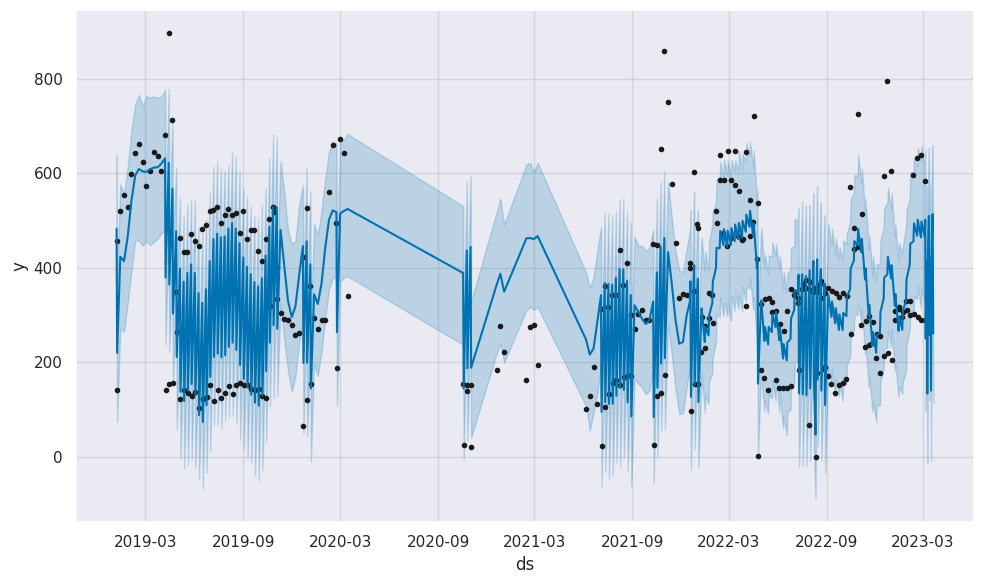

In [29]:

baseline_model = Prophet()
baseline_model.fit(generate_route_df(traffic_df,"NTE", "FUE").rename(columns={'date':'ds', 'pax_total':'y'}))

future_df = baseline_model.make_future_dataframe(periods=15)   #prepare to predict 15 days
future_df

forecast_df = baseline_model.predict(future_df)

baseline_model.plot(forecast_df);


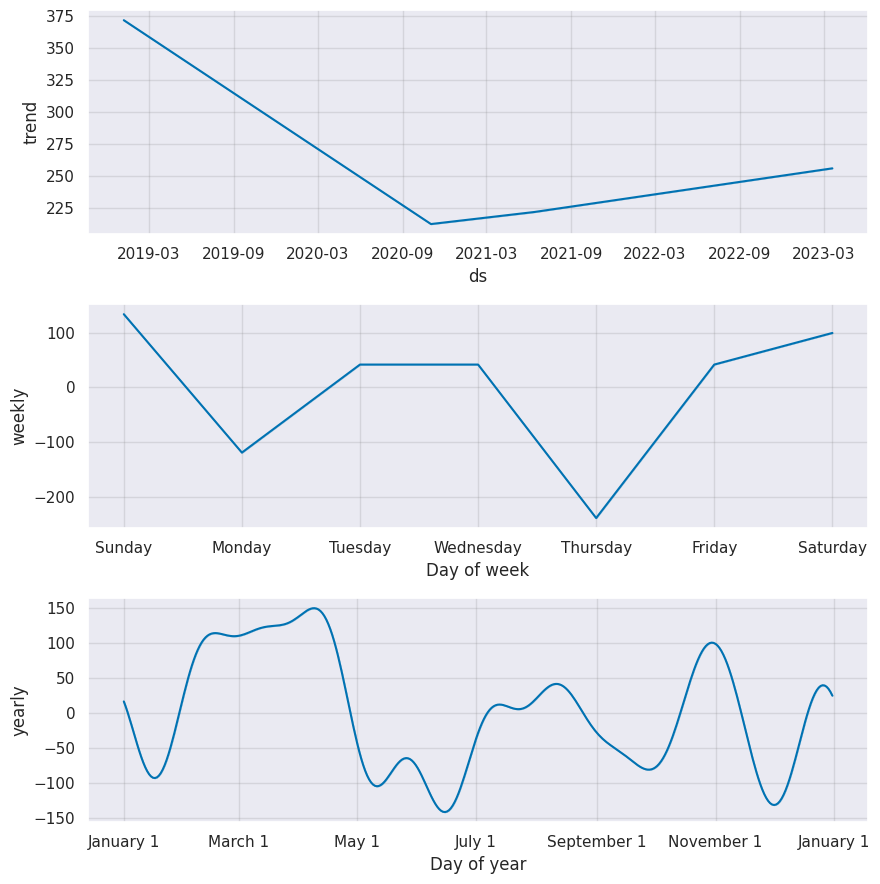

In [30]:

baseline_model.plot_components(forecast_df);

## Evaluate performance
- **metrique** : Soit rmse (somme de la racine carré y moins de yhate le tout au carée) soit mape (valeur absolue de ((y-yhate)/y)
- **procédure** : validation croisé pas utilisable sur une time serie car on casse le time serie à la place on utilise time split CV

In [31]:
from prophet.diagnostics import cross_validation

In [ ]:
eval_df=cross_validation(baseline_model,initial='366 days' ,period= '90 days', horizon='90 days')

In [33]:
from prophet.diagnostics import performance_metrics

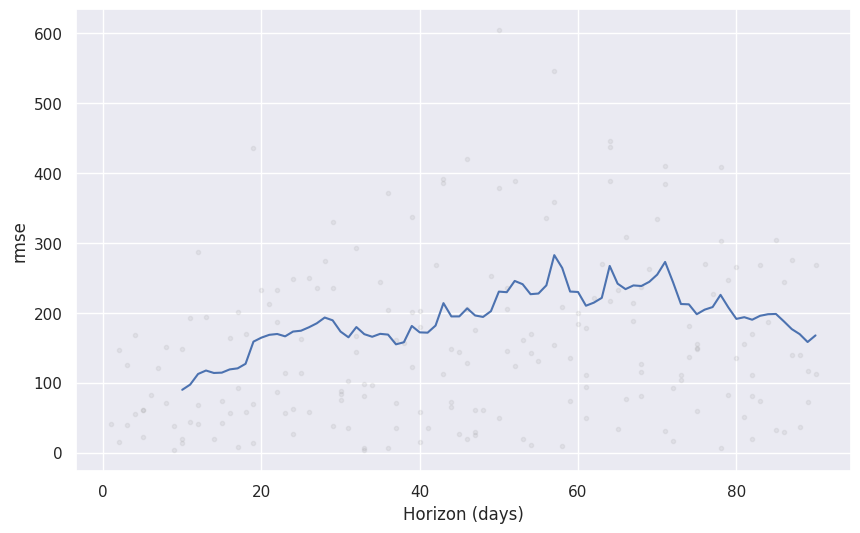

In [34]:
from prophet.plot import plot_cross_validation_metric

## Evaluate performance
plot_cross_validation_metric(eval_df,metric='rmse');

## Amélioration du model Prophet par optimisation des hyperparametres

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmk0iasok/5qz459en.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmk0iasok/socgpxd7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=16822', 'data', 'file=/tmp/tmpmk0iasok/5qz459en.json', 'init=/tmp/tmpmk0iasok/socgpxd7.json', 'output', 'file=/tmp/tmpmk0iasok/prophet_modeltiidi2ku/prophet_model-20240129092659.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:26:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:26:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 25 forecasts with cutoffs between 2017-01-09 00:00:00 and 2022-12-09 00:00:00


  0%|          | 0/25 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpmk0iasok/4wm5o04a.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmk0iasok/n1u6vgnj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=15785', 'data', 'file=/tmp/tmpmk0iasok/4wm5o04a.json', 'init=/tmp/tmpmk0iasok/n1u6vgnj.json', 'output', 'file=/tmp/tmpmk0iasok/prophet_modeln7xgdd3k/prophet_model-20240129092659.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:26:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:26:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmk0iasok/_ea39eqp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmk0iasok/hz_vy238.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/25 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpmk0iasok/4u26uigm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmk0iasok/31imth5m.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=85055', 'data', 'file=/tmp/tmpmk0iasok/4u26uigm.json', 'init=/tmp/tmpmk0iasok/31imth5m.json', 'output', 'file=/tmp/tmpmk0iasok/prophet_modelzx_nh588/prophet_model-20240129092709.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:27:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:27:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmk0iasok/n77z4120.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmk0iasok/hz2_bjyb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/25 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpmk0iasok/nx45csly.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmk0iasok/x9lp96wf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=30846', 'data', 'file=/tmp/tmpmk0iasok/nx45csly.json', 'init=/tmp/tmpmk0iasok/x9lp96wf.json', 'output', 'file=/tmp/tmpmk0iasok/prophet_model7nd08swm/prophet_model-20240129092727.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:27:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:27:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmk0iasok/q99ccf5n.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmk0iasok/__q7t0je.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/25 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpmk0iasok/zpe1chxk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmk0iasok/kkyswbpf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=15158', 'data', 'file=/tmp/tmpmk0iasok/zpe1chxk.json', 'init=/tmp/tmpmk0iasok/kkyswbpf.json', 'output', 'file=/tmp/tmpmk0iasok/prophet_modelt3gs83zx/prophet_model-20240129092747.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:27:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:27:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmk0iasok/3mf8381p.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmk0iasok/n_ye01it.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/25 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpmk0iasok/nby57j5k.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmk0iasok/d72yvic1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=22168', 'data', 'file=/tmp/tmpmk0iasok/nby57j5k.json', 'init=/tmp/tmpmk0iasok/d72yvic1.json', 'output', 'file=/tmp/tmpmk0iasok/prophet_model_za88qf7/prophet_model-20240129092757.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:27:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:27:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmk0iasok/ul73ql6w.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmk0iasok/cjx9p448.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/25 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpmk0iasok/dol26are.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmk0iasok/95pyg067.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=46968', 'data', 'file=/tmp/tmpmk0iasok/dol26are.json', 'init=/tmp/tmpmk0iasok/95pyg067.json', 'output', 'file=/tmp/tmpmk0iasok/prophet_modelk2mtem74/prophet_model-20240129092808.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:28:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:28:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmk0iasok/r37l6z2j.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmk0iasok/664ffujm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/25 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpmk0iasok/tu2zj575.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmk0iasok/7naiiwck.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=49579', 'data', 'file=/tmp/tmpmk0iasok/tu2zj575.json', 'init=/tmp/tmpmk0iasok/7naiiwck.json', 'output', 'file=/tmp/tmpmk0iasok/prophet_modelzcfra7w3/prophet_model-20240129092819.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:28:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:28:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmk0iasok/48x6lv4x.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmk0iasok/syz8jijw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/25 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpmk0iasok/purt4jra.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmk0iasok/ya1f6lyv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=6244', 'data', 'file=/tmp/tmpmk0iasok/purt4jra.json', 'init=/tmp/tmpmk0iasok/ya1f6lyv.json', 'output', 'file=/tmp/tmpmk0iasok/prophet_model8nyfa_h8/prophet_model-20240129092833.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:28:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:28:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmk0iasok/1eiqaj1s.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmk0iasok/gpf0isfx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/l

  0%|          | 0/25 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpmk0iasok/f_4z3_ay.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmk0iasok/m9s6t01k.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=36445', 'data', 'file=/tmp/tmpmk0iasok/f_4z3_ay.json', 'init=/tmp/tmpmk0iasok/m9s6t01k.json', 'output', 'file=/tmp/tmpmk0iasok/prophet_model4jnowduk/prophet_model-20240129092846.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:28:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:28:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmk0iasok/q0n24_lp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmk0iasok/i628qs0i.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/25 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpmk0iasok/3nccdpiw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmk0iasok/25yiesg6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=39440', 'data', 'file=/tmp/tmpmk0iasok/3nccdpiw.json', 'init=/tmp/tmpmk0iasok/25yiesg6.json', 'output', 'file=/tmp/tmpmk0iasok/prophet_model2lr1i45x/prophet_model-20240129092859.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:28:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:28:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmk0iasok/gkrlw76f.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmk0iasok/zzwzf_8t.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/25 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpmk0iasok/5tck3nql.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmk0iasok/6y8n3udd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=52794', 'data', 'file=/tmp/tmpmk0iasok/5tck3nql.json', 'init=/tmp/tmpmk0iasok/6y8n3udd.json', 'output', 'file=/tmp/tmpmk0iasok/prophet_modelqth3vn98/prophet_model-20240129092912.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:29:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:29:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmk0iasok/2e9uhb5k.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmk0iasok/q6rwszh3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/25 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpmk0iasok/70lak1mq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmk0iasok/rr8phxjj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=15263', 'data', 'file=/tmp/tmpmk0iasok/70lak1mq.json', 'init=/tmp/tmpmk0iasok/rr8phxjj.json', 'output', 'file=/tmp/tmpmk0iasok/prophet_model33f39zab/prophet_model-20240129092925.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:29:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:29:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmk0iasok/4ivn3emi.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmk0iasok/m4n0weaz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/25 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpmk0iasok/q69wgjuy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmk0iasok/_v5vgm8b.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=11011', 'data', 'file=/tmp/tmpmk0iasok/q69wgjuy.json', 'init=/tmp/tmpmk0iasok/_v5vgm8b.json', 'output', 'file=/tmp/tmpmk0iasok/prophet_modelh6qkhkg6/prophet_model-20240129092939.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:29:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:29:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmk0iasok/2r2in6dj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmk0iasok/un76fkfo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/25 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpmk0iasok/_5kwxejg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmk0iasok/uee7d6_2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=18297', 'data', 'file=/tmp/tmpmk0iasok/_5kwxejg.json', 'init=/tmp/tmpmk0iasok/uee7d6_2.json', 'output', 'file=/tmp/tmpmk0iasok/prophet_modeliyxob_kx/prophet_model-20240129093001.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:30:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:30:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmk0iasok/qmy6zv0n.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmk0iasok/rl2yk22k.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/25 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpmk0iasok/6btazegg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmk0iasok/ep1r9v5r.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=17474', 'data', 'file=/tmp/tmpmk0iasok/6btazegg.json', 'init=/tmp/tmpmk0iasok/ep1r9v5r.json', 'output', 'file=/tmp/tmpmk0iasok/prophet_model8rs16p84/prophet_model-20240129093026.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:30:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:30:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmk0iasok/vrhzrqra.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmk0iasok/m0hukemy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/25 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpmk0iasok/t0to5v43.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmk0iasok/587twl8i.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=75177', 'data', 'file=/tmp/tmpmk0iasok/t0to5v43.json', 'init=/tmp/tmpmk0iasok/587twl8i.json', 'output', 'file=/tmp/tmpmk0iasok/prophet_modelb0b8g3dz/prophet_model-20240129093052.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:30:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:30:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmk0iasok/3ltf1ia_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmk0iasok/u82flmyb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/25 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpmk0iasok/c9rltrta.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmk0iasok/zvlzc8dy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=96380', 'data', 'file=/tmp/tmpmk0iasok/c9rltrta.json', 'init=/tmp/tmpmk0iasok/zvlzc8dy.json', 'output', 'file=/tmp/tmpmk0iasok/prophet_modelhu2r3hhm/prophet_model-20240129093116.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:31:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:31:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmk0iasok/p6gooh2l.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmk0iasok/8_qdgcdg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/25 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpmk0iasok/6skhlw2u.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmk0iasok/swte_4qi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=86625', 'data', 'file=/tmp/tmpmk0iasok/6skhlw2u.json', 'init=/tmp/tmpmk0iasok/swte_4qi.json', 'output', 'file=/tmp/tmpmk0iasok/prophet_modelx79730z8/prophet_model-20240129093141.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:31:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:31:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmk0iasok/mac8cwg_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmk0iasok/tcyeeajd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

Best Parameters:
{'changepoint_prior_scale': 1.0, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 1.0}


DEBUG:cmdstanpy:input tempfile: /tmp/tmpmk0iasok/09gwqpmh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=11587', 'data', 'file=/tmp/tmpmk0iasok/tsoby2tb.json', 'init=/tmp/tmpmk0iasok/09gwqpmh.json', 'output', 'file=/tmp/tmpmk0iasok/prophet_modelgihige5p/prophet_model-20240129093205.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:32:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:32:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


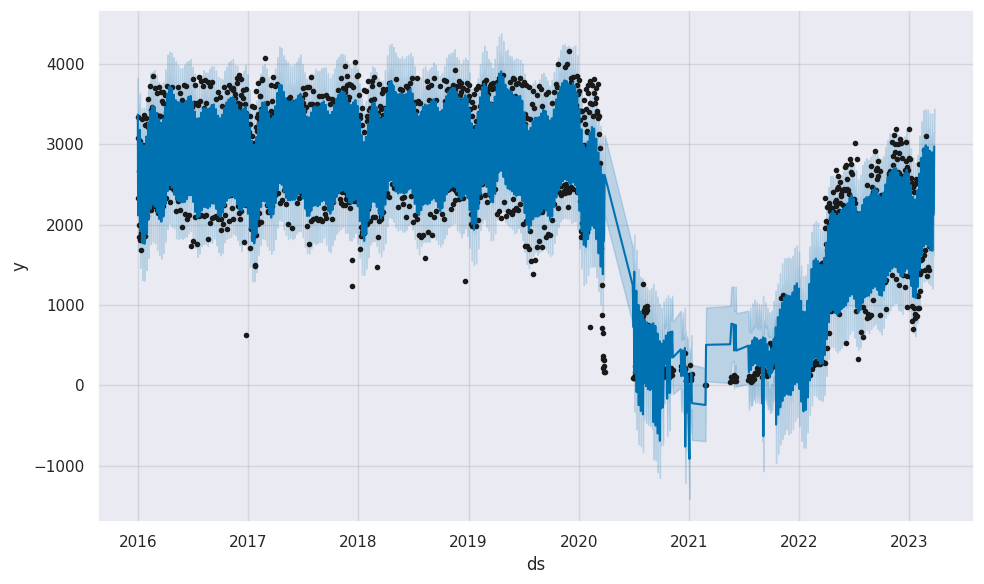

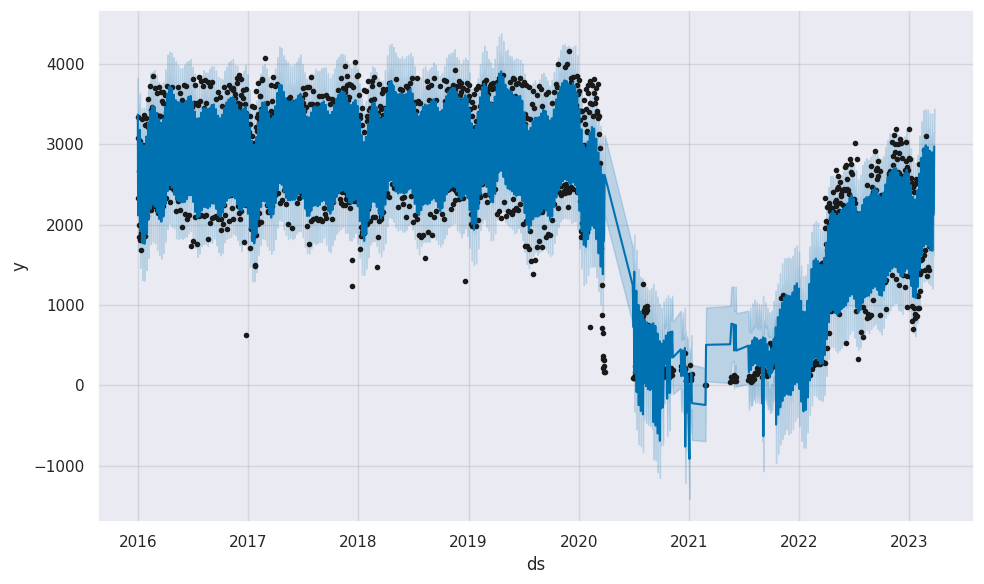

In [35]:
from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics
from prophet.plot import plot_cross_validation_metric
from sklearn.model_selection import ParameterGrid

# Function to evaluate Prophet model with given parameters
def evaluate_prophet_model(params):
    model = Prophet(**params)
    model.fit(generate_route_df(traffic_df, "LGW", "AMS").rename(columns={'date': 'ds', 'pax_total': 'y'}))
    cv_results = cross_validation(model, initial='366 days', period='90 days', horizon='90 days')
    performance = performance_metrics(cv_results)
    rmse = performance['rmse'].values[0]
    return rmse

# Define parameter grid for optimization
param_grid = {
    'changepoint_prior_scale': [0.01, 0.1, 1.0],
    'seasonality_mode': ['additive', 'multiplicative'],
    'seasonality_prior_scale': [0.01, 0.1, 1.0]
}

# Perform grid search to find best parameters
best_rmse = float('inf')
best_params = None

for params in ParameterGrid(param_grid):
    rmse = evaluate_prophet_model(params)
    if rmse < best_rmse:
        best_rmse = rmse
        best_params = params

# Print the best parameters
print("Best Parameters:")
print(best_params)

# Create and fit the Prophet model with the best parameters
model = Prophet(**best_params)
model.fit(generate_route_df(traffic_df, "LGW", "AMS").rename(columns={'date': 'ds', 'pax_total': 'y'}))

# Make future predictions
future_df = model.make_future_dataframe(periods=15)
forecast_df = model.predict(future_df)

# Plot the forecast
model.plot(forecast_df, xlabel='ds', ylabel='y')


INFO:prophet:Making 25 forecasts with cutoffs between 2017-01-09 00:00:00 and 2022-12-09 00:00:00


  0%|          | 0/25 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpmk0iasok/eatzy3s6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmk0iasok/iri_ix36.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25955', 'data', 'file=/tmp/tmpmk0iasok/eatzy3s6.json', 'init=/tmp/tmpmk0iasok/iri_ix36.json', 'output', 'file=/tmp/tmpmk0iasok/prophet_modelc_gb2wt0/prophet_model-20240129093208.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:32:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:32:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmk0iasok/o8669lh7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmk0iasok/vj6kre4l.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

<Axes: xlabel='horizon'>

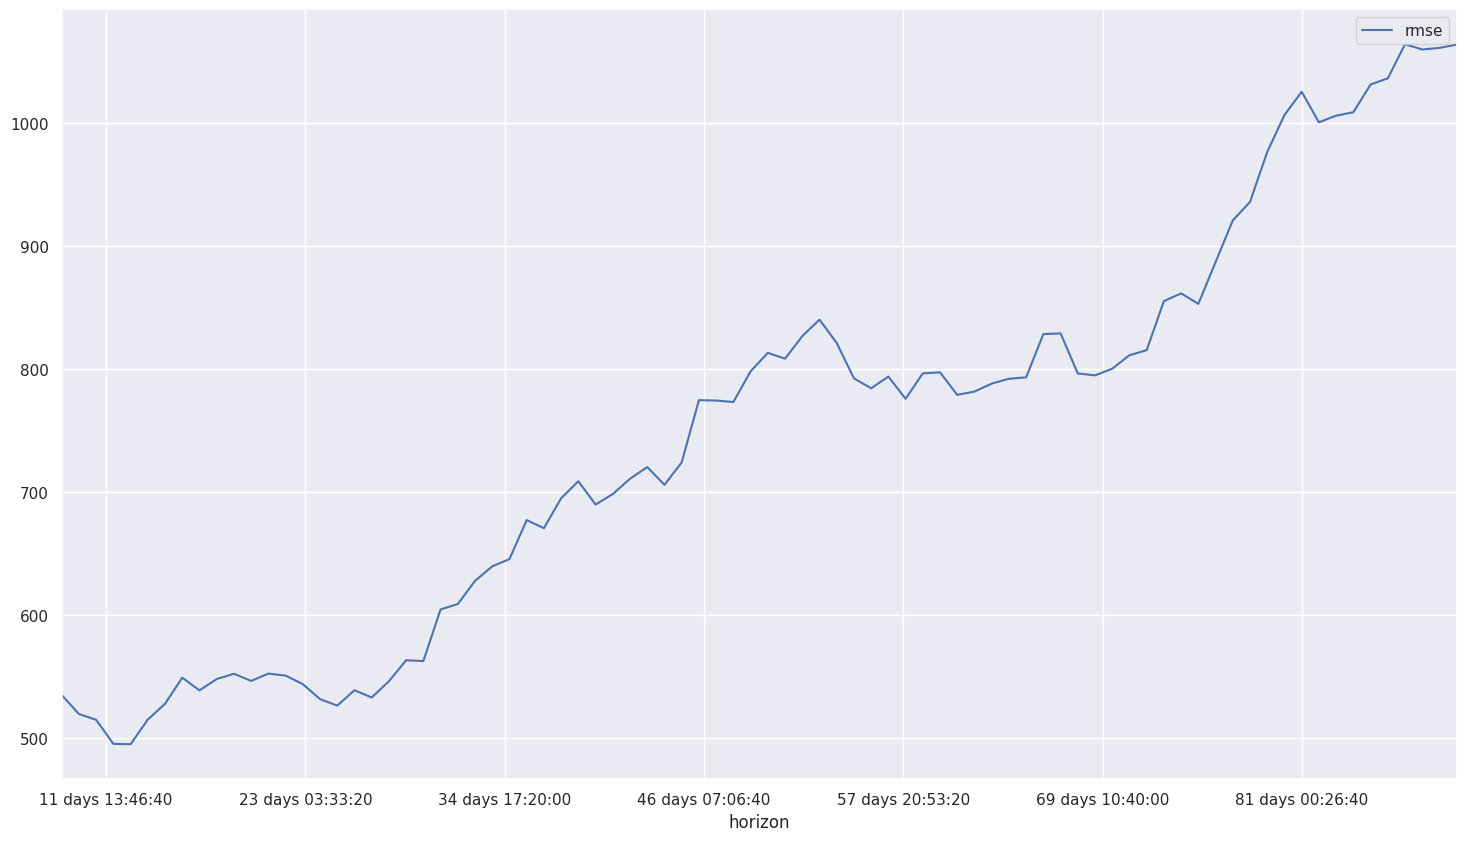

In [36]:
# Perform cross-validation and plot the RMSE metric
cv_results = cross_validation(model, initial='366 days', period='90 days', horizon='90 days')
performance = performance_metrics(cv_results)#.rename(columns={'horizon': 'ds'})

performance.plot(x='horizon', y='rmse', figsize=(18,10))


L'idée pour améliorer l'entrainement du modèle, nous avons optimisé les hyper parametres, cependent les résultats ne sont pas convaincants. l'idéale serait d'ogmenter le nomtre d'hyperparametre à tester.

# Model with nixtia

In [37]:
!pip install mlforecast &> /dev/null


In [38]:
import lightgbm as lgb
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from mlforecast import MLForecast

from numba import njit
from window_ops.expanding import expanding_mean
from window_ops.rolling import rolling_mean

tested_models = [
    lgb.LGBMRegressor(),
    xgb.XGBRegressor(),
    RandomForestRegressor(random_state=0),
]



@njit
def rolling_mean_28(x):
    return rolling_mean(x, window_size=28)


fcst = MLForecast(
    models=tested_models,
    freq='D',
    lags=[7, 14,21,28],
    lag_transforms={
        1: [expanding_mean],
        7: [rolling_mean_28]
    },
    date_features=['dayofweek']
)


In [39]:
nixtia_model=fcst.fit(generate_route_df(traffic_df,"LGW", "AMS").drop(columns=['paired_airport']),id_col='home_airport',time_col='date',target_col='pax_total')

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000277 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1537
[LightGBM] [Info] Number of data points in the train set: 2214, number of used features: 7
[LightGBM] [Info] Start training from score 2388.147245


In [40]:
predict_df= nixtia_model.predict(30)
predict_df

home_airport       date  LGBMRegressor  XGBRegressor  RandomForestRegressor
0           LGW 2023-03-10    2719.714420   2819.989014                2727.83
1           LGW 2023-03-11    1557.936484   1394.119629                1505.21
2           LGW 2023-03-12    2674.980701   2877.711914                2652.39
3           LGW 2023-03-13    1858.453276   1723.447876                1849.79
4           LGW 2023-03-14    1692.542503   1601.532837                1718.40
5           LGW 2023-03-15    1610.707798   1441.242065                1556.84
6           LGW 2023-03-16    2103.353291   2344.066650                1932.16
7           LGW 2023-03-17    2539.876428   2869.955322                2684.60
8           LGW 2023-03-18    1601.613722   1430.562134                1488.79
9           LGW 2023-03-19    2629.308303   2836.561768                2660.31
10          LGW 2023-03-20    1677.615375   1687.698120                1687.66
11          LGW 2023-03-21    1601.854858   1578.633667                1712.94
12          LGW 2023-03-22    1623.717619   1301.783325                1581.12
13          LGW 2023-03-23    2085.005191   2221.727539                1770.26
14          LGW 2023-03-24    2496.853016   2758.806396                2621.20
15          LGW 2023-03-25    1603.942583   1385.037109                1487.35
16          LGW 2023-03-26    2303.968644   2264.338623                2573.38
17          LGW 2023-03-27    1589.211329   1861.903198                1675.54
18          LGW 2023-03-28    1568.825382   1733.261597                1629.92
19          LGW 2023-03-29    1600.139408   1398.228271                1661.76
20          LGW 2023-03-30    1894.352023   2235.463623                1611.83
21          LGW 2023-03-31    2410.768326   2584.479736                2597.44
22          LGW 2023-04-01    1643.679057   1377.657471                1473.21
23          LGW 2023-04-02    2333.116055   2421.430664                2546.73
24          LGW 2023-04-03    1689.073103   1886.954834                1775.65
25          LGW 2023-04-04    1629.103702   1570.078491                1725.25
26          LGW 2023-04-05    1602.865561   1411.313477                1750.51
27          LGW 2023-04-06    2140.175941   2225.356445                1679.35
28          LGW 2023-04-07    2630.171381   2575.016846                2593.86
29          LGW 2023-04-08    1721.802812   1424.254028                1490.99

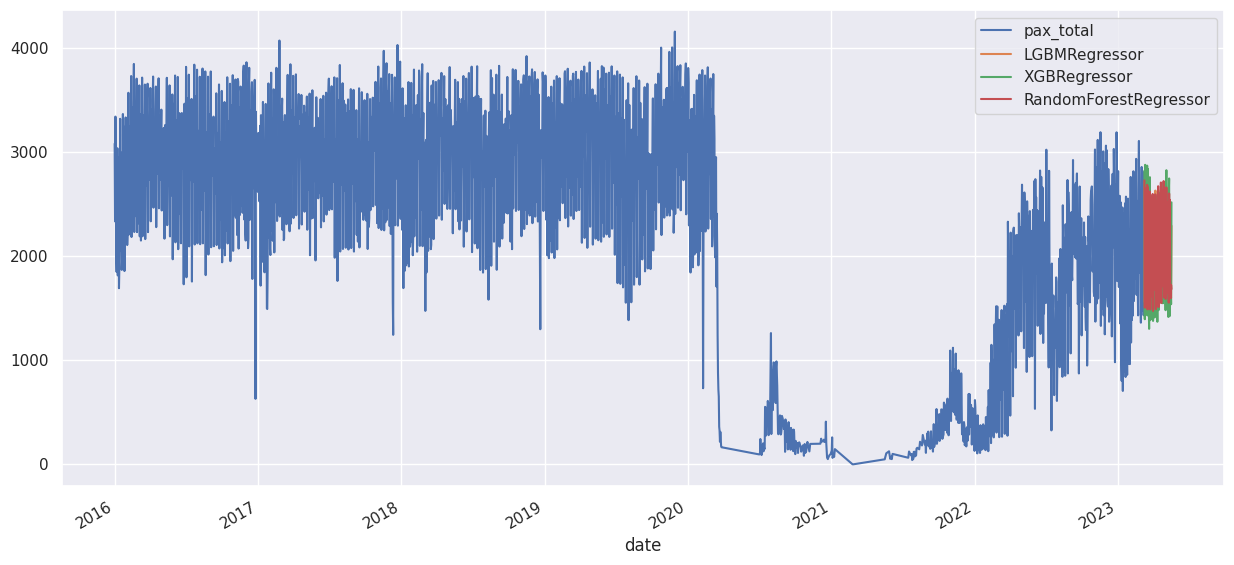

In [41]:
(pd.concat([generate_route_df(traffic_df, 'LGW', 'AMS').drop(columns=['paired_airport']),
            nixtia_model.predict(7*10)])
.set_index('date')
).plot(figsize=(15, 7));

In [42]:
import plotly.offline as pyoff
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import pandas as pd
from typing import Union, List, Optional

def draw_ts_multiple(df: pd.DataFrame, v1: Union[str, List[str]], v2: Optional[str] = None,
                     prediction: Optional[str] = None, date: str = 'date',
                     secondary_y: bool = True, covid_start: Optional[str] = None,
                     covid_end: Optional[str] = None, display: bool = True,
                     moving_avg_window: Optional[int] = None) -> go.Figure:
    """
    Draw time series on multiple y axes, with COVID period option.

    Args:
    - df (pd.DataFrame): Time series dataframe (one line per date, series in columns).
    - v1 (str or list[str]): Name or list of names of the series to plot on the first y-axis.
    - v2 (str): Name of the series to plot on the second y-axis (default: None).
    - prediction (str): Name of the predicted series displayed with a dotted line (default: None).
    - date (str): Name of the date column (default: 'date').
    - secondary_y (bool): Use a secondary y-axis if v2 is used (default: True).
    - covid_start (str): Start date of the COVID-19 period (default: None).
    - covid_end (str): End date of the COVID-19 period (default: None).
    - display (bool): Display the figure (default: True).
    - moving_avg_window (int): Window size for computing the moving average (default: None).

    Returns:
    - fig (plotly.graph_objs._figure.Figure): Plotly figure.

    Notes:
    Make sure to use the semi-colon trick if you don't want to have the figure displayed twice.
    Or use `display=False`.
    """
    if isinstance(v1, str):
        v1 = [v1]
    v1_series_names = [f'{v} (V1)' for v in v1]  # Improved series naming
    v2_series_name = f'{v2} (V2)' if v2 else None

    # Enhanced layout configuration
    layout = {
        'title': ' & '.join(v1_series_names + [v2_series_name] if v2 else v1_series_names),
        'xaxis': {
            'rangeselector': {
                'buttons': [
                    {'count': 1, 'label': '1m', 'step': 'month', 'stepmode': 'backward'},
                    {'count': 3, 'label': '3m', 'step': 'month', 'stepmode': 'backward'},
                    {'count': 6, 'label': '6m', 'step': 'month', 'stepmode': 'backward'},
                    {'count': 8, 'label': '8m', 'step': 'month', 'stepmode': 'backward'},
                    {'count': 12, 'label': '1Y', 'step': 'month', 'stepmode': 'backward'},
                    {'count': 24, 'label': '2Y', 'step': 'month', 'stepmode': 'backward'},
                    {'count': 36, 'label': '3Y', 'step': 'month', 'stepmode': 'backward'},
                    {'count': 58, 'label': '4Y', 'step': 'month', 'stepmode': 'backward'},
                    {'step': 'all'}
                ]
            },
            'rangeslider': {'visible': True},
            'type': 'date'
        }
    }

    fig = make_subplots(specs=[[{"secondary_y": secondary_y}]], shared_xaxes=True)
    fig.update_layout(layout)

    # Adding traces for v1 series
    for i, v in enumerate(v1):
        fig.add_trace(go.Scatter(x=df[date], y=df[v], name=v1_series_names[i]), secondary_y=False)

        # Adding moving average and bounds if applicable
        if moving_avg_window:
            # Compute moving average and standard deviation
            moving_avg = df[v].rolling(window=moving_avg_window, min_periods=1).mean()
            std = df[v].rolling(window=moving_avg_window, min_periods=1).std()
            upper_bound = moving_avg + 2 * std
            lower_bound = moving_avg - 2 * std

            fig.add_trace(go.Scatter(x=df[date], y=moving_avg, name=f'{v} Moving Avg.'), secondary_y=False)
            fig.add_trace(go.Scatter(x=df[date], y=upper_bound, name=f'{v} Upper Bound', line={'dash': 'dash'}), secondary_y=False)
            fig.add_trace(go.Scatter(x=df[date], y=lower_bound, name=f'{v} Lower Bound', line={'dash': 'dash'}), secondary_y=False)

    # Adding v2 series if provided
    if v2:
        fig.add_trace(go.Scatter(x=df[date], y=df[v2], name=v2_series_name), secondary_y=secondary_y)

    # Adding prediction series if provided
    if prediction:
        fig.add_trace(go.Scatter(x=df[date], y=df[prediction], name=f'Prediction: {prediction}', line={'dash': 'dot'}), secondary_y=False)

    # Highlighting COVID period if specified
    if covid_start and covid_end:
        fig.add_vrect(x0=pd.Timestamp(covid_start), x1=pd.Timestamp(covid_end),
                      fillcolor='Gray', opacity=0.5, layer='below', line_width=0)

    # Display the figure if required
    if display:
        pyoff.iplot(fig)

    return fig


df1 = (pd.concat([generate_route_df(traffic_df, 'LGW', 'AMS').drop(columns=['paired_airport']),
            nixtia_model.predict(7*10)]).set_index('date').reset_index())
df1

# Chart configuration
date_column = 'date'
passenger_column = 'pax_total'
title = 'Passenger Traffic LGW-AMS'
covid_period = ('2020-03-01', '2022-01-30')
line_colors = ['#ff7f0e']
line_width = 2
marker_size = 6
x_label = 'Date'
legend_labels = ['Nombre de passager']
LGBMRegressor	="LGBMRegressor"
XGBRegressor	="XGBRegressor"
RandomForestRegressor= "RandomForestRegressor"


# Generate the chart
fig = draw_ts_multiple(df1, v1=passenger_column, date=date_column, v2=None,
                       prediction=LGBMRegressor, secondary_y=False, covid_start=covid_period[0],
                       covid_end=covid_period[1], display=True, moving_avg_window=7)




In [43]:
# Generate the chart
fig = draw_ts_multiple(df1, v1=passenger_column, date=date_column, v2=None,
                       prediction=XGBRegressor, secondary_y=False, covid_start=covid_period[0],
                       covid_end=covid_period[1], display=True, moving_avg_window=7)


In [44]:

# Generate the chart
fig = draw_ts_multiple(df1, v1=passenger_column, date=date_column, v2=None,
                       prediction=RandomForestRegressor, secondary_y=False, covid_start=covid_period[0],
                       covid_end=covid_period[1], display=True, moving_avg_window=7)

In [ ]:
crossvalidation_df = fcst.cross_validation(
    generate_route_df(traffic_df, "LGW", "AMS").drop(columns=['paired_airport']),
    90,
    5,
    id_col='home_airport',
    time_col='date',
    target_col='pax_total'
)

In [52]:
!pip install datasetsforecast  &> /dev/null

In [53]:
crossvalidation_df

home_airport       date     cutoff  pax_total  LGBMRegressor  \
0            LGW 2021-12-15 2021-12-14      229.0     247.388358   
1            LGW 2021-12-16 2021-12-14      429.0     333.465729   
2            LGW 2021-12-17 2021-12-14      676.0     375.507521   
3            LGW 2021-12-18 2021-12-14      286.0     274.401623   
4            LGW 2021-12-19 2021-12-14      676.0     448.453006   
..           ...        ...        ...        ...            ...   
445          LGW 2023-03-05 2023-03-04     2815.0    2452.183229   
446          LGW 2023-03-06 2023-03-04     1916.0    1841.078394   
447          LGW 2023-03-07 2023-03-04     1741.0    1777.125183   
448          LGW 2023-03-08 2023-03-04     1432.0    1478.742654   
449          LGW 2023-03-09 2023-03-04     2029.0    2371.444969   

     XGBRegressor  RandomForestRegressor  
0      317.593872                 260.25  
1      464.477417                 326.30  
2      447.999268                 327.45  
3      257.275391                 261.68  
4      457.650269                 339.90  
..            ...                    ...  
445   2558.197510                2477.43  
446   1760.491577                1905.48  
447   1744.941040                1849.59  
448   1443.071411                1456.45  
449   2312.588135                2367.39  

[450 rows x 7 columns]

In [54]:
import numpy as np

def mse(y, y_hat):
  delta_y = np.square(y - y_hat)
  return np.nanmean(delta_y)

def rmse(y, y_hat):
  return np.sqrt(mse(y, y_hat))


cv_rmse = crossvalidation_df.groupby(['home_airport', 'cutoff']).apply(lambda df: rmse(df['pax_total'], df['LGBMRegressor'])).mean()
print("RMSE using cross-validation: ", cv_rmse)

RMSE using cross-validation:  355.1064065857528


In [55]:
cv_rmse = crossvalidation_df.groupby(['home_airport', 'cutoff']).apply(lambda df: rmse(df['pax_total'], df['LGBMRegressor'])).mean()
print("LGBM RMSE using cross-validation: ", cv_rmse)
cv_rmse = crossvalidation_df.groupby(['home_airport', 'cutoff']).apply(lambda df: rmse(df['pax_total'], df['RandomForestRegressor'])).mean()
print("RandomForest RMSE using cross-validation: ", cv_rmse)
cv_rmse = crossvalidation_df.groupby(['home_airport', 'cutoff']).apply(lambda df: rmse(df['pax_total'], df['XGBRegressor'])).mean()
print("XGBoost RMSE using cross-validation: ", cv_rmse)

cv_rmse = (crossvalidation_df
           .assign(Ensemble=lambda _df: _df[['LGBMRegressor', 'RandomForestRegressor', 'XGBRegressor']].mean(axis=1))
           .groupby(['home_airport', 'cutoff']).apply(lambda df: rmse(df['pax_total'], df['Ensemble'])).mean())
print("Ensemble RMSE using cross-validation: ", cv_rmse)

LGBM RMSE using cross-validation:  355.1064065857528
RandomForest RMSE using cross-validation:  353.66954542826426
XGBoost RMSE using cross-validation:  378.87078234993226
Ensemble RMSE using cross-validation:  349.00453507143754


# modèle avec neuralforecast

In [56]:
!pip install neuralforecast  &> /dev/null

In [60]:
from neuralforecast import NeuralForecast
from neuralforecast.models import NBEATS, NHITS

horizon = 90
models = [NBEATS(input_size=2 * horizon, h=horizon, max_steps=50),
          NHITS(input_size=2 * horizon, h=horizon, max_steps=50)]

nforecast = NeuralForecast(models=models, freq='D')
nforecast.fit(df=generate_route_df(traffic_df, "LGW", "AMS").drop(columns=['paired_airport']).rename(columns={'home_airport': 'unique_id',
                                                                                                      'date': 'ds',
                                                                                                      'pax_total': 'y'}))

INFO:lightning_fabric.utilities.seed:Seed set to 1
INFO:lightning_fabric.utilities.seed:Seed set to 1


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

In [61]:
nforecast

Predicting: |          | 0/? [00:00<?, ?it/s]

Predicting: |          | 0/? [00:00<?, ?it/s]

<Axes: xlabel='ds'>

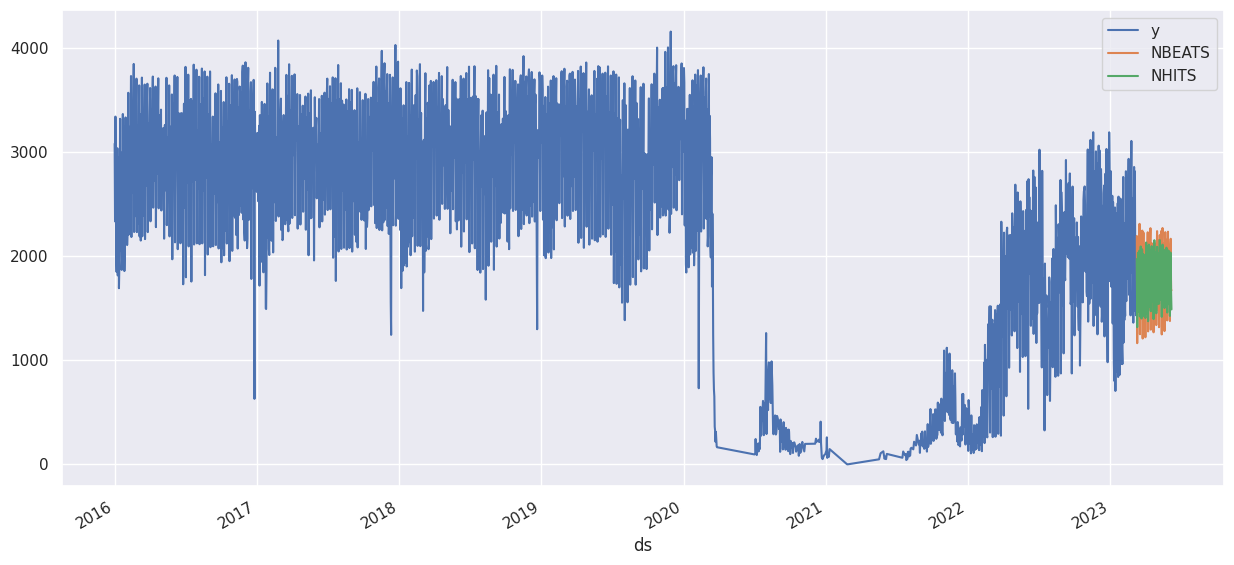

In [62]:
pd.concat(
    [
        generate_route_df(traffic_df, "LGW", "AMS").drop(columns=['paired_airport']).rename(columns={'home_airport': 'unique_id',
                                                                                                     'date': 'ds',
                                                                                                     'pax_total': 'y'}),
        nforecast.predict().reset_index()
    ]
).set_index('ds').plot(figsize=(15,7))